In the MASS package, you’ll find the data frame cats, which provides
data on sex, body weight (in kilograms), and heart weight (in grams)
for 144 household cats (see Venables and Ripley, 2002, for further
details); you can read the documentation with a call to ?cats. Load
the MASS package with a call to library("MASS"), and access the object
directly by entering cats at the console prompt

__a.__ Plot heart weight on the vertical axis and body weight on the
horizontal axis, using different colors or point characters to
distinguish between male and female cats. Annotate your plot
with a legend and appropriate axis labels.

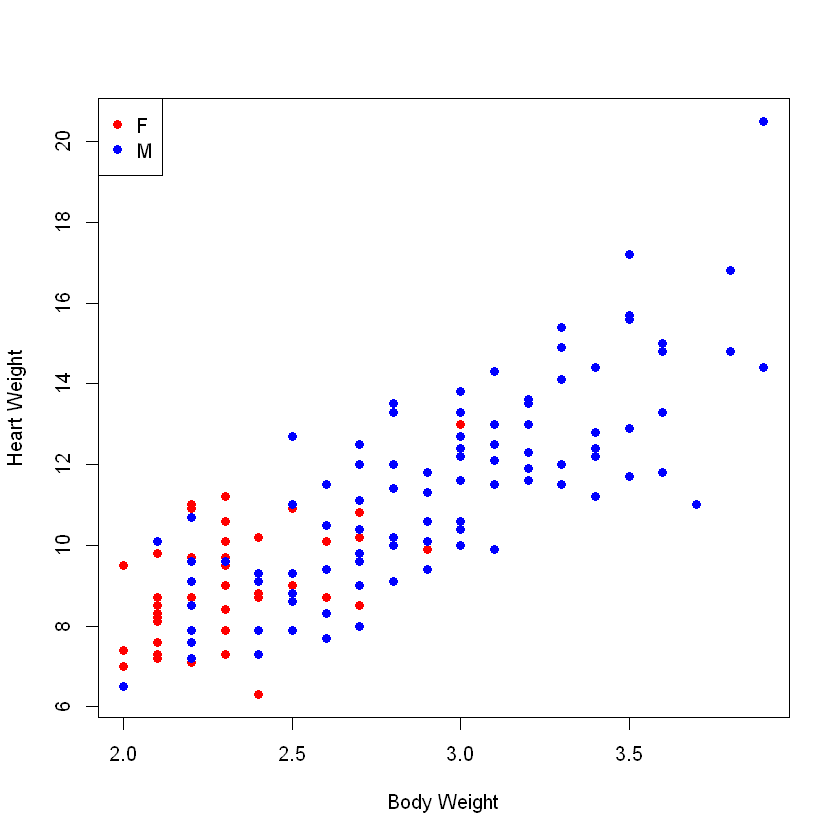

In [6]:
library(MASS)
plot(cats$Hwt ~ cats$Bwt, col = c("red", "blue")[as.numeric(cats$Sex)], pch = 16, xlab = "Body Weight", 
                            ylab = "Heart Weight")
legend("topleft", legend = levels(cats$Sex), col =  c("red", "blue"), pch = 16)


__b.__ Fit a least-squares multiple linear regression model using heart
weight as the response variable and the other two variables as
predictors, and view a model summary. <br>
i. Write down the equation for the fitted model and interpret
the estimated regression coefficients for body weight and
sex. Are both statistically significant? What does this say
about the relationship between the response and predictors? <br>
ii. Report and interpret the coefficient of determination and
the outcome of the omnibus F -test.

In [24]:
fit = lm(Hwt ~ Bwt + Sex, data = cats)
summary(fit)
print(coef(fit))


Call:
lm(formula = Hwt ~ Bwt + Sex, data = cats)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5833 -0.9700 -0.0948  1.0432  5.1016 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.4149     0.7273  -0.571    0.569    
Bwt           4.0758     0.2948  13.826   <2e-16 ***
SexM         -0.0821     0.3040  -0.270    0.788    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.457 on 141 degrees of freedom
Multiple R-squared:  0.6468,	Adjusted R-squared:  0.6418 
F-statistic: 129.1 on 2 and 141 DF,  p-value: < 2.2e-16


(Intercept)         Bwt        SexM 
-0.41495263  4.07576892 -0.08209684 


__Equation: "Heart Weight" = -0.4149 + 4.0758 \* Bwt - 0.0821 \* Sex __

If Female, sex = 0. 
If Male, sex = 1

In [28]:
R2 = summary(fit)$r.squared
n = nrow(cats)
p = length(coef(fit))-1
Fstat = (R2*(n-p-1))/((1-R2)*p)
Fstat

[1] 129.1056

In [31]:
1-pf(Fstat,df1=p,df2=n-p-1)

[1] 0

You can see that the omnibus F-test for this example gives a p-value
that’s so small, it’s effectively zero. These calculations match the relevant
results reported in the output of summary(fit) completely

__c.__ <br> Tilman’s cat, Sigma, is a 3.4 kg female. Use your model to estimate her mean heart weight and provide a 95 percent prediction
interval.

In [48]:
predict(fit, newdata = data.frame(Bwt = 3.4, Sex = "F"), data = cats, interval = "prediction", level = 0.95)
cats[cats$Bwt == 3.4, c("Bwt", "Hwt", "Sex")]

,fit,lwr,upr
1,13.44266,10.46904,16.41628


,Bwt,Hwt,Sex
126,3.4,11.2,M
127,3.4,12.2,M
128,3.4,12.4,M
129,3.4,12.8,M
130,3.4,14.4,M


__d.__
Use predict to superimpose continuous lines based on the fitted
linear model on your plot from (a), one for male cats and one
for female. What do you notice? Does this reflect the statistical
significance (or lack thereof) of the parameter estimates?

(Intercept)         Bwt        SexM 
-0.41495263  4.07576892 -0.08209684

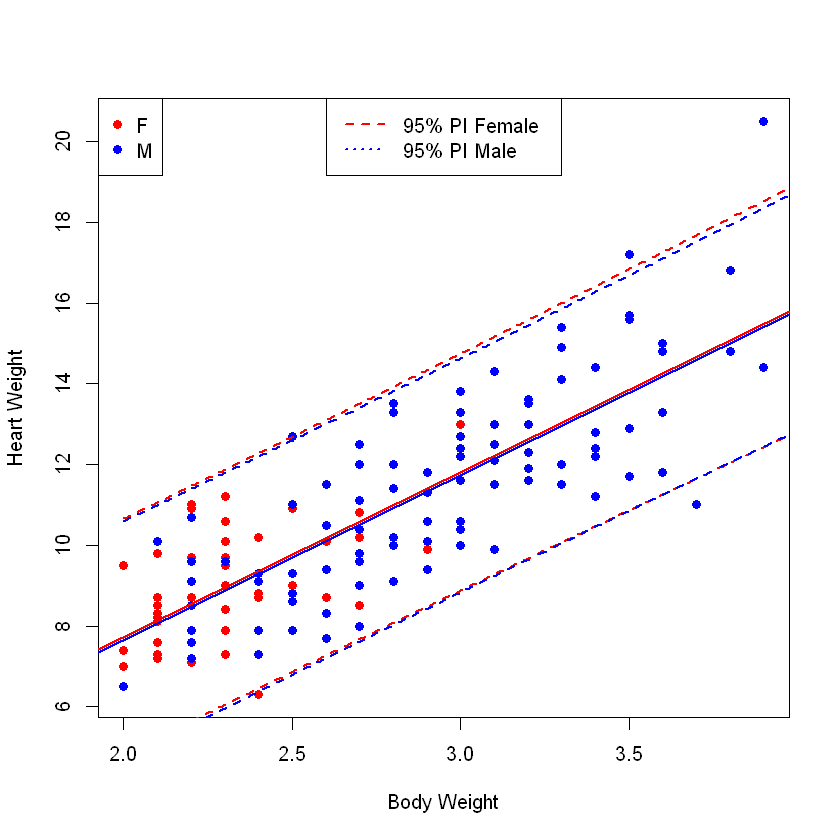

In [98]:
fit.coefs =  coef(fit)
fit.coefs

plot(cats$Hwt ~ cats$Bwt, col = c("red", "blue")[as.numeric(cats$Sex)], pch = 16, xlab = "Body Weight",  ylab = "Heart Weight")

abline(a=fit.coefs[1],b=fit.coefs[2],col="red",lwd=2)
abline(a=fit.coefs[1]+fit.coefs[3],b=fit.coefs[2],col="blue",lwd=2)

#Construct PI interval for Female Cat
xval = data.frame(Bwt = seq(2,4, length = 200), Sex = rep("F", 200))
pi.band = predict(fit, xval, interval = "predict", confidence = 0.95 )
lines(xval[,1], pi.band[,2], lty = 2, col = "red", lwd = 2)
lines(xval[,1], pi.band[,3], lty = 2, col = "red", lwd = 2)

#Construct PI interval for Male Cat
xval = data.frame(Bwt = seq(2,4, length = 200), Sex = rep("M", 200))
pi.band = predict(fit, xval, interval = "predict", confidence = 0.95 )
lines(xval[,1], pi.band[,2], lty = 2, col = "blue", lwd = 2)
lines(xval[,1], pi.band[,3], lty = 2, col = "blue", lwd = 2)

legend("topleft", legend = levels(cats$Sex), col =  c("red", "blue"), pch = 16)
legend("top", legend = c("95% PI Female", "95% PI Male"), col =  c("red", "blue"),  lwd = 2, lty = c(2,3))


__The boot package (Davison and Hinkley, 1997; Canty and Ripley,
2015) is another library of R code that’s included with the standard
installation but isn’t automatically loaded. Load boot with a call to
library("boot"). You’ll find a data frame called nuclear, which contains
data on the construction of nuclear power plants in the United States
in the late 1960s (Cox and Snell, 1981)__


__e.__ Access the documentation by entering ?nuclear at the prompt
and examine the details of the variables. (Note there is a mistake
for date, which provides the date that the construction permits
were issued—it should read “measured in years since January
1 1900 to the nearest month.”) Use pairs to produce a quick
scatterplot matrix of the data.

In [102]:
library("boot")
head(nuclear)

cost,date,t1,t2,cap,pr,ne,ct,bw,cum.n,pt
460.05,68.58,14,46,687,0,1,0,0,14,0
452.99,67.33,10,73,1065,0,0,1,0,1,0
443.22,67.33,10,85,1065,1,0,1,0,1,0
652.32,68.00,11,67,1065,0,1,1,0,12,0
642.23,68.00,11,78,1065,1,1,1,0,12,0
345.39,67.92,13,51,514,0,1,1,0,3,0


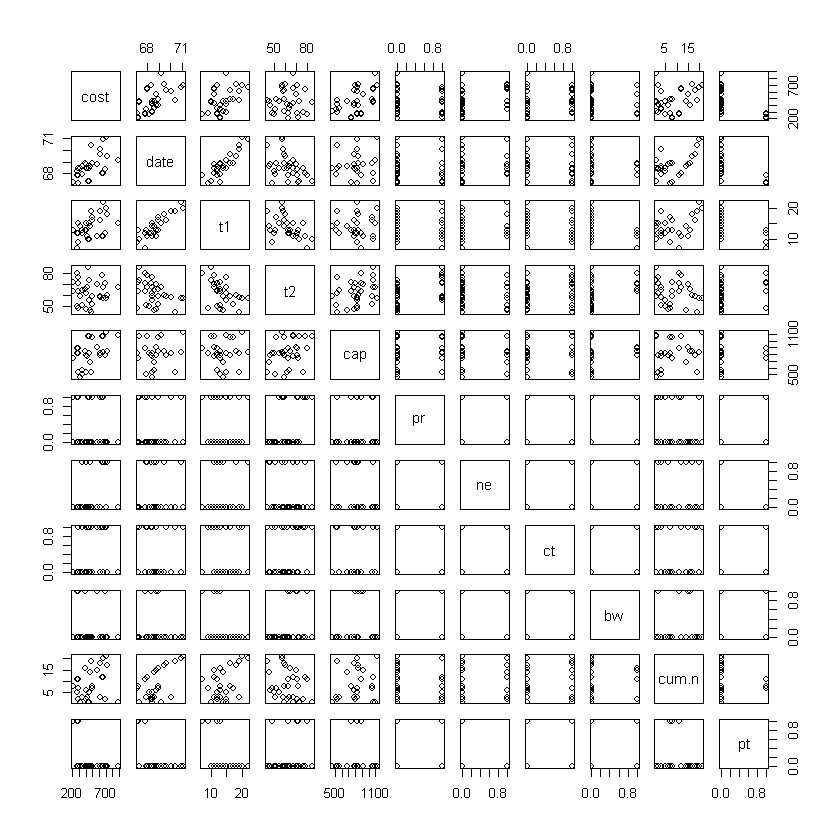

In [103]:
pairs(nuclear)

__f.__ One of the original objectives was to predict the cost of further
construction of these power plants. Create a fit and summary of
a linear regression model that aims to model cost by t1 and t2,
two variables that describe different elapsed times associated with
the application for and issue of various permits. Take note of the
estimated regression coefficients and their significance in the
fitted model

In [106]:
fit = lm(cost ~ t1 + t2, data = nuclear)
summary(fit)
print(coef(fit))


Call:
lm(formula = cost ~ t1 + t2, data = nuclear)

Residuals:
    Min      1Q  Median      3Q     Max 
-273.17  -73.42  -13.40   69.31  360.61 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -242.146    268.020  -0.903  0.37373   
t1            29.908      9.086   3.292  0.00262 **
t2             4.689      2.945   1.592  0.12224   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 150.1 on 29 degrees of freedom
Multiple R-squared:  0.272,	Adjusted R-squared:  0.2218 
F-statistic: 5.418 on 2 and 29 DF,  p-value: 0.01001


(Intercept)          t1          t2 
-242.145862   29.908040    4.688908 


__g.__ Refit the model, but this time also include an effect for the date
the construction permit was issued. Contrast the output for this
new model against the previous one. What do you notice, and
what does this information suggest about the relationships in the
data with respect to these predictors?

In [114]:
fit2 = lm(cost ~ t1 + t2 + date, data = nuclear)
summary(fit2)
print(coef(fit2))


Call:
lm(formula = cost ~ t1 + t2 + date, data = nuclear)

Residuals:
    Min      1Q  Median      3Q     Max 
-208.63  -90.74  -12.07   59.78  324.19 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -9232.833   2974.432  -3.104  0.00434 **
t1             -5.918     14.281  -0.414  0.68176   
t2              4.639      2.601   1.784  0.08535 . 
date          138.324     45.617   3.032  0.00519 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 132.5 on 28 degrees of freedom
Multiple R-squared:  0.452,	Adjusted R-squared:  0.3933 
F-statistic: 7.698 on 3 and 28 DF,  p-value: 0.000667


 (Intercept)           t1           t2         date 
-9232.832721    -5.917655     4.638558   138.323969 


__h.__ Fit a third model for power plant cost, using the predictors for
“date of permit issue,” “power plant capacity,” and the binary
variable describing whether the plant was sited in the northeastern United States. Write down the fitted model equation
and provide 95 percent confidence intervals for each estimated
coefficient

In [115]:
fit3 = lm(cost ~ date + cap + ne , data = nuclear)
summary(fit3)
print(coef(fit3))


Call:
lm(formula = cost ~ date + cap + ne, data = nuclear)

Residuals:
     Min       1Q   Median       3Q      Max 
-154.966  -68.202   -3.614   45.919  285.014 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.458e+03  1.216e+03  -5.310 1.19e-05 ***
date         9.544e+01  1.773e+01   5.382 9.77e-06 ***
cap          4.157e-01  9.463e-02   4.393 0.000145 ***
ne           1.261e+02  4.092e+01   3.083 0.004575 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 99.74 on 28 degrees of freedom
Multiple R-squared:  0.6895,	Adjusted R-squared:  0.6562 
F-statistic: 20.73 on 3 and 28 DF,  p-value: 2.827e-07


  (Intercept)          date           cap            ne 
-6458.3889006    95.4385587     0.4157157   126.1287688 


In [116]:
confint(fit)

,2.5 %,97.5 %
(Intercept),-790.308934,306.01721
t1,11.325636,48.49044
t2,-1.335068,10.71288


In [117]:
confint(fit2)

,2.5 %,97.5 %
(Intercept),-1.532568e+04,-3139.985663
t1,-3.517138e+01,23.336067
t2,-6.889603e-01,9.966077
date,4.488118e+01,231.766761


In [118]:
confint(fit3)

,2.5 %,97.5 %
(Intercept),-8949.8032112,-3966.9745900
date,59.1134640,131.7636535
cap,0.2218791,0.6095524
ne,42.3145363,209.9430014


__The following table gives an excerpt of a historical data set compiled between 1961 and 1973. It concerns the annual murder rate in
Detroit, Michigan; the data were originally presented and analyzed
by Fisher (1976) and are reproduced here from Harraway (1995).
In the data set you’ll find the number of murders, police officers,
and gun licenses issued per 100,000 population, as well as the overall
unemployment rate as a percentage of the overall population__

__i.__ Create your own data frame in your R workspace and produce
a scatterplot matrix. Which of the variables appears to be most
strongly related to the murder rate?

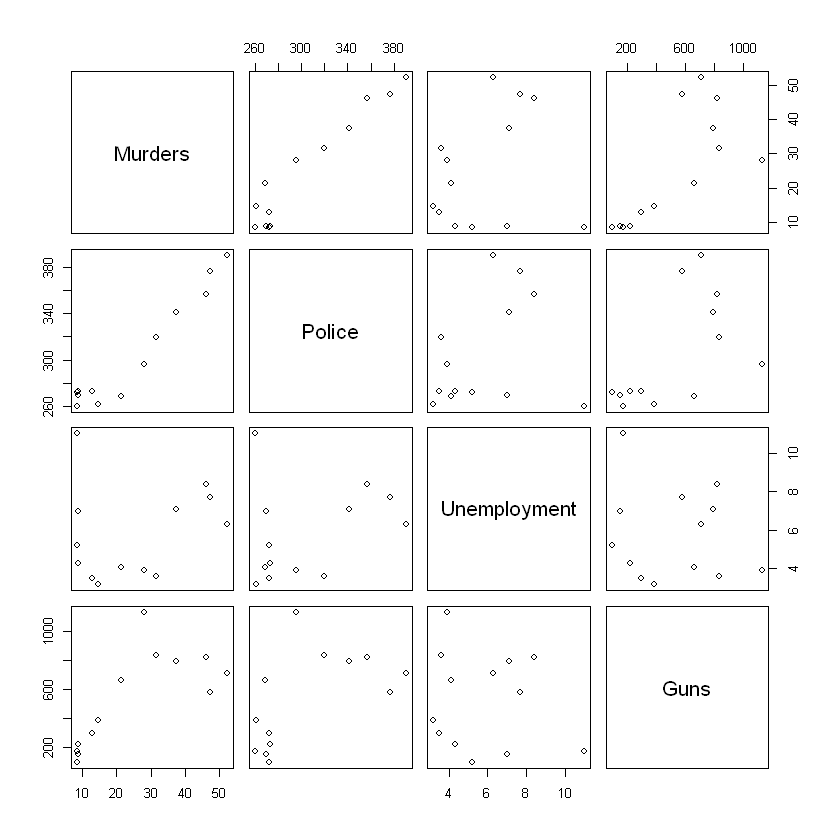

In [122]:
Murders = c(8.60, 8.90, 8.52, 8.89, 13.07, 14.57, 21.36, 28.03, 31.49, 37.39, 46.26, 47.24, 52.33)
Police = c(260.35,269.8 ,272.04,272.96,272.51,261.34,268.89,295.99,319.87,341.43,356.59,376.69,390.19)
Unemployment = c(11,7,5.2,4.3,3.5,3.2,4.1,3.9,3.6,7.1,8.4,7.7,6.3)
Guns = c(178.15,156.41,98.02,222.1,301.92,391.22,665.56,1131.21,837.6,794.9,817.74,583.17,709.59)
table = data.frame(Murders, Police, Unemployment, Guns)
pairs(table)

Police appears to be most strongly related to the murder rates

__j.__ <br> Fit a multiple linear regression model using the number of
murders as the response and all other variables as predictors.
Write down the model equation and interpret the coefficients. Is
it reasonable to state that all relationships between the response
and the predictors are causal?

In [125]:
fit = lm(Murders ~ Police + Unemployment + Guns, data = table)
summary(fit)


Call:
lm(formula = Murders ~ Police + Unemployment + Guns, data = table)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9108 -1.9376  0.0573  0.8892  4.5495 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -68.359320   5.666327 -12.064 7.36e-07 ***
Police         0.280249   0.023598  11.876 8.41e-07 ***
Unemployment   0.132532   0.389850   0.340  0.74169    
Guns           0.013929   0.003276   4.252  0.00214 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.78 on 9 degrees of freedom
Multiple R-squared:  0.9784,	Adjusted R-squared:  0.9712 
F-statistic:   136 on 3 and 9 DF,  p-value: 8.174e-08


Murders = -68.359320 + 0.280249 \* Police + 0.132532 \* Unemployment + 0.013929 \* Guns

__k__. <br>
Identify the amount of variation in the response attributed to
the joint effect of the three explanatory variables. Then refit the
model excluding the predictor associated with the largest (in
other words, “most nonsignificant”) p-value. Compare the new
coefficient of determination with that of the previous model. Is
there much difference

In [126]:
fit1 = lm(Murders ~ Police + Unemployment + Guns, data = table)
summary(fit1)


Call:
lm(formula = Murders ~ Police + Unemployment + Guns, data = table)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9108 -1.9376  0.0573  0.8892  4.5495 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -68.359320   5.666327 -12.064 7.36e-07 ***
Police         0.280249   0.023598  11.876 8.41e-07 ***
Unemployment   0.132532   0.389850   0.340  0.74169    
Guns           0.013929   0.003276   4.252  0.00214 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.78 on 9 degrees of freedom
Multiple R-squared:  0.9784,	Adjusted R-squared:  0.9712 
F-statistic:   136 on 3 and 9 DF,  p-value: 8.174e-08


In [127]:
fi2 = lm(Murders ~ Police + Unemployment, data = table)
summary(fit2)


Call:
lm(formula = cost ~ t1 + t2 + date, data = nuclear)

Residuals:
    Min      1Q  Median      3Q     Max 
-208.63  -90.74  -12.07   59.78  324.19 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -9232.833   2974.432  -3.104  0.00434 **
t1             -5.918     14.281  -0.414  0.68176   
t2              4.639      2.601   1.784  0.08535 . 
date          138.324     45.617   3.032  0.00519 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 132.5 on 28 degrees of freedom
Multiple R-squared:  0.452,	Adjusted R-squared:  0.3933 
F-statistic: 7.698 on 3 and 28 DF,  p-value: 0.000667


In [128]:
fit3 = lm(Murders ~ Police + Guns, data = table)
summary(fit3)


Call:
lm(formula = Murders ~ Police + Guns, data = table)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1302 -1.7936  0.1022  0.8947  4.5211 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -68.495811   5.396355 -12.693 1.72e-07 ***
Police        0.284011   0.019898  14.273 5.63e-08 ***
Guns          0.013473   0.002854   4.721 0.000815 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.654 on 10 degrees of freedom
Multiple R-squared:  0.9781,	Adjusted R-squared:  0.9738 
F-statistic: 223.7 on 2 and 10 DF,  p-value: 4.992e-09


In [129]:
fit4 = lm(Murders ~ Unemployment + Guns, data = table)
summary(fit4)


Call:
lm(formula = Murders ~ Unemployment + Guns, data = table)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.3311  -4.3600  -0.6609   2.1653  18.9804 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -9.004279  10.341856  -0.871  0.40435   
Unemployment  2.303994   1.333694   1.728  0.11477   
Guns          0.039232   0.009639   4.070  0.00225 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.77 on 10 degrees of freedom
Multiple R-squared:  0.6402,	Adjusted R-squared:  0.5682 
F-statistic: 8.896 on 2 and 10 DF,  p-value: 0.006031


__l__ <br>
Use your model from (k) to predict the mean number of murders per 100,000 residents, with 300 police officers and 500
issued gun licenses. Compare this to the mean response if there
were no gun licenses issued and provide 99 percent confidence
intervals for both predictions.

In [130]:
fit3 = lm(Murders ~ Police + Guns, data = table)
fit3.coefs = coef(fit3)
fit3.coefs


(Intercept)       Police         Guns 
-68.49581147   0.28401112   0.01347277

In [137]:
police = 300
guns = 500
cat("Muder rate: ", fit3.coefs[1] + police * fit3.coefs[2] + guns * fit3.coefs[3])
predict(fit3, newdata = data.frame(Police = police, Guns = guns), interval = "confidence", level = .99)

Muder rate:  23.44391

,fit,lwr,upr
1,23.44391,21.09699,25.79083


In [134]:
police = 300
guns = 500
cat("Muder rate: ", fit3.coefs[1] + police * fit3.coefs[2])
predict(fit3, newdata = data.frame(Police = police, Guns = 0), interval = "confidence", level = .99)

Muder rate:  16.70752

,fit,lwr,upr
1,16.70752,11.51793,21.89712
